In [1]:
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from AudioClassifier import *

In [2]:
local_config = {
    'data_path'     : 'LL_AudioDB/',
    'metadata_file' : 'LL_AudioDB/metadata/kitchen20b.csv',
    'nb_classes'    :  26,}

In [3]:
# ----------------------------
# Prepare training data from Metadata file
# ----------------------------

data_path = local_config['data_path']

# Read metadata file
metadata_file = local_config['metadata_file']

df = pd.read_csv(metadata_file)
df.head()

,Unnamed: 0,category,fold,orig_idx,path,take,target,usr_id
0,0,blender,1,0,audio/0-158737-A-0.wav,A,0,158737
1,1,blender,1,1,audio/0-158737-B-0.wav,B,0,158737
2,2,blender,1,2,audio/0-158737-C-0.wav,C,0,158737
3,3,blender,1,3,audio/0-173319-A-0.wav,A,0,173319
4,4,blender,1,4,audio/0-173319-B-0.wav,B,0,173319


In [4]:
# Take relevant columns
df = df[['path', 'target']]

df.head()

,path,target
0,audio/0-158737-A-0.wav,0
1,audio/0-158737-B-0.wav,0
2,audio/0-158737-C-0.wav,0
3,audio/0-173319-A-0.wav,0
4,audio/0-173319-B-0.wav,0


In [5]:
myds = SoundDS(df, data_path)

# Random split of 80:20 between training and validation
train_ds, val_ds = myds.split(0.8)

# Create training and validation data loaders
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

In [6]:
myModel = AudioClassifier()
summary(myModel,(2, 4000, 64))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 500, 8]          --
├─Conv2d: 1-2                            [-1, 8, 2000, 32]         408
├─Sequential: 1                          []                        --
|    └─Conv2d: 2-1                       [-1, 8, 2000, 32]         (recursive)
├─ReLU: 1-3                              [-1, 8, 2000, 32]         --
├─Sequential: 1                          []                        --
|    └─ReLU: 2-2                         [-1, 8, 2000, 32]         --
├─BatchNorm2d: 1-4                       [-1, 8, 2000, 32]         16
├─Sequential: 1                          []                        --
|    └─BatchNorm2d: 2-3                  [-1, 8, 2000, 32]         (recursive)
├─Conv2d: 1-5                            [-1, 16, 1000, 16]        1,168
├─Sequential: 1                          []                        --
|    └─Conv2d: 2-4                       [-1, 16, 1000, 16]    

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 32, 500, 8]          --
├─Conv2d: 1-2                            [-1, 8, 2000, 32]         408
├─Sequential: 1                          []                        --
|    └─Conv2d: 2-1                       [-1, 8, 2000, 32]         (recursive)
├─ReLU: 1-3                              [-1, 8, 2000, 32]         --
├─Sequential: 1                          []                        --
|    └─ReLU: 2-2                         [-1, 8, 2000, 32]         --
├─BatchNorm2d: 1-4                       [-1, 8, 2000, 32]         16
├─Sequential: 1                          []                        --
|    └─BatchNorm2d: 2-3                  [-1, 8, 2000, 32]         (recursive)
├─Conv2d: 1-5                            [-1, 16, 1000, 16]        1,168
├─Sequential: 1                          []                        --
|    └─Conv2d: 2-4                       [-1, 16, 1000, 16]    

In [7]:
# Create the model and put it on the GPU if available
myModel = AudioClassifier(local_config['nb_classes'])

In [12]:
num_epochs = 350   
myModel.trainer(train_dl, num_epochs)

Epoch: 0, Loss: 2.97, Accuracy: 0.10
Epoch: 1, Loss: 2.76, Accuracy: 0.18
Epoch: 2, Loss: 2.51, Accuracy: 0.26
Epoch: 3, Loss: 2.32, Accuracy: 0.30
Epoch: 4, Loss: 2.12, Accuracy: 0.35
Epoch: 5, Loss: 1.98, Accuracy: 0.40
Epoch: 6, Loss: 1.86, Accuracy: 0.41
Epoch: 7, Loss: 1.76, Accuracy: 0.44
Epoch: 8, Loss: 1.67, Accuracy: 0.48
Epoch: 9, Loss: 1.66, Accuracy: 0.46
Epoch: 10, Loss: 1.54, Accuracy: 0.51
Epoch: 11, Loss: 1.42, Accuracy: 0.55
Epoch: 12, Loss: 1.50, Accuracy: 0.51
Epoch: 13, Loss: 1.47, Accuracy: 0.53
Epoch: 14, Loss: 1.43, Accuracy: 0.53
Epoch: 15, Loss: 1.32, Accuracy: 0.58
Epoch: 16, Loss: 1.33, Accuracy: 0.58
Epoch: 17, Loss: 1.29, Accuracy: 0.59
Epoch: 18, Loss: 1.30, Accuracy: 0.57
Epoch: 19, Loss: 1.26, Accuracy: 0.58
Epoch: 20, Loss: 1.34, Accuracy: 0.55
Epoch: 21, Loss: 1.26, Accuracy: 0.59
Epoch: 22, Loss: 1.15, Accuracy: 0.63
Epoch: 23, Loss: 1.25, Accuracy: 0.59
Epoch: 24, Loss: 1.17, Accuracy: 0.64
Epoch: 25, Loss: 1.13, Accuracy: 0.63
Epoch: 26, Loss: 1.12,

Epoch: 213, Loss: 0.49, Accuracy: 0.82
Epoch: 214, Loss: 0.48, Accuracy: 0.84
Epoch: 215, Loss: 0.44, Accuracy: 0.84
Epoch: 216, Loss: 0.46, Accuracy: 0.85
Epoch: 217, Loss: 0.43, Accuracy: 0.85
Epoch: 218, Loss: 0.42, Accuracy: 0.86
Epoch: 219, Loss: 0.46, Accuracy: 0.85
Epoch: 220, Loss: 0.45, Accuracy: 0.85
Epoch: 221, Loss: 0.43, Accuracy: 0.85
Epoch: 222, Loss: 0.49, Accuracy: 0.85
Epoch: 223, Loss: 0.54, Accuracy: 0.83
Epoch: 224, Loss: 0.37, Accuracy: 0.88
Epoch: 225, Loss: 0.40, Accuracy: 0.86
Epoch: 226, Loss: 0.46, Accuracy: 0.85
Epoch: 227, Loss: 0.36, Accuracy: 0.88
Epoch: 228, Loss: 0.43, Accuracy: 0.86
Epoch: 229, Loss: 0.44, Accuracy: 0.85
Epoch: 230, Loss: 0.44, Accuracy: 0.86
Epoch: 231, Loss: 0.51, Accuracy: 0.84
Epoch: 232, Loss: 0.44, Accuracy: 0.86
Epoch: 233, Loss: 0.39, Accuracy: 0.86
Epoch: 234, Loss: 0.45, Accuracy: 0.85
Epoch: 235, Loss: 0.41, Accuracy: 0.88
Epoch: 236, Loss: 0.39, Accuracy: 0.86
Epoch: 237, Loss: 0.41, Accuracy: 0.87
Epoch: 238, Loss: 0.39, A

In [10]:
# Run inference on trained model with the validation set
myModel.inference(val_dl)

Accuracy: 0.89, Total items: 287


In [16]:
# Saving the trained model
myModel.save_checkpoint(num_epochs)

Checkpoint saved to checkpoints/model_350ep


In [11]:
# Loading the pre-trained model - Uncomment if needed

# epochs = 350

# myModel = AudioClassifier(local_config['nb_classes'])
# model_out_path = "checkpoints/" + "model_" + "{}ep".format(epochs) 
# myModel.load_checkpoint(model_out_path)

In [7]:
targets, preds_1 = myModel.get_all_prediction(val_dl)

normalized confusion matrix


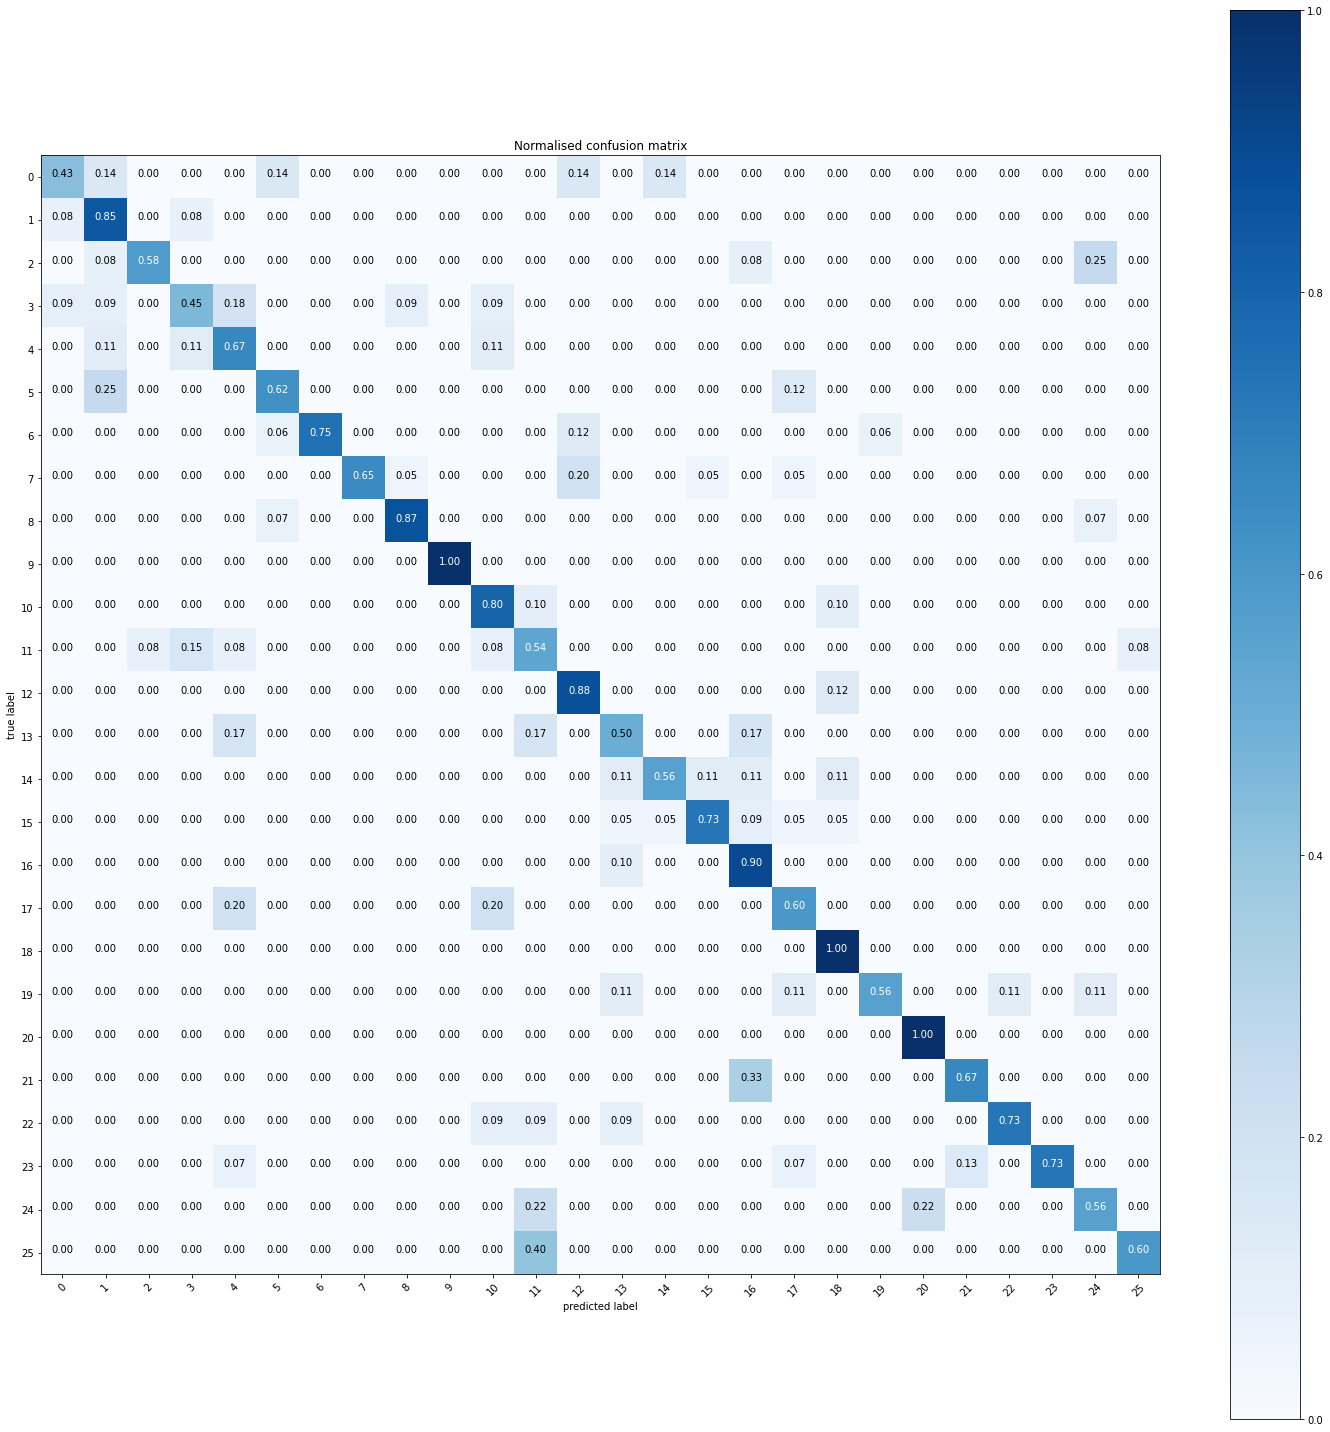

In [8]:
# compute confusion matrix
cnf_matrix = confusion_matrix(targets,preds_1)
np.set_printoptions(precision=2)

class_names = [i for i in range(26)]
# plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix,classes=class_names,normalize=True,title='Normalised confusion matrix')

plt.show()

In [ ]:
# blender, dishwasher, fridge, microwave, stove-fan, stove-burner, frying-pan, water-flowing, 
# boiling-water, juicer, cupboard, drawer, clean-dishes, cutlery, book, chopping, cutlery, plates, 
# eat, peel, window-blind, plates, sweep, trash, sitting-and-moving, radio, plugging, 
# moving-furniture, computer, chatting, clean-dishes

# 0: blender
# 1: dishwasher
# 2: fridge
# 3: microwave
# 4: stove-fan
# 5: stove-burner
# 6: frying-pan
# 7: water-flowing
# 8: boiling-water
# 9: juicer
# 10: cupboard
# 11: drawer
# 12: clean-dishes 
# 13: book
# 14: chopping
# 15: cutlery 
# 16: eat
# 17: peel 
# 18: plates 
# 19: sweep 
# 20: window-blind
# 21: tv
# 22: trash
# 23: radio
# 24: moving-furniture
# 25: chattering
